In [16]:
import sys; sys.path.append('..')
from brain.sdk import BrainClient
from brain.schema import MultiModalInput,TextPromptInput

In [17]:
from pydantic import BaseModel


class FooSchema(BaseModel):
    answer:str
    explanation:str

brain_client = BrainClient("http://127.0.0.1:8000")

@brain_client.reasoner(schema=FooSchema)
def foo(system_prompt="You are helpful ai agent", user_prompt="what is 2+2"):
    return MultiModalInput(text=TextPromptInput(system_prompt=system_prompt, user_prompt=user_prompt))

In [18]:
function_id = foo.register()
print(f"Registered Reasoner ID: {function_id}")

# Use the function
result = brain_client.use(function_id)(system_prompt="You are helpful ai agent", user_prompt="what is 2+2")
print(f"Result: {result}")

Registered Reasoner ID: a8bbf181-f028-4d3a-95d3-9c31a4be6bc5
Result: answer='4' explanation='2 + 2 equals 4 because when you add two units to another two units, you obtain a total of four units.'


In [19]:
@brain_client.reasoner(schema=FooSchema)
def foo(user_prompt):
    return user_prompt

function_id = foo.register()
print(f"Registered Reasoner ID: {function_id}")

# Use the function
result = brain_client.use(function_id)(user_prompt="what is 2+2")
print(f"Result: {result}")

Registered Reasoner ID: ae011443-230c-4aa7-a848-2d027be7a970
Result: answer='4' explanation='The expression 2 + 2 is a simple arithmetic operation where you add the integers 2 and 2 together. The result is 4.'


In [20]:
@brain_client.reasoner(schema=FooSchema)
def foo(user_prompt):
    return user_prompt,"you are a math genious, add to the explanation that 'i am a king'"

function_id = foo.register()
print(f"Registered Reasoner ID: {function_id}")

# Use the function
result = brain_client.use(function_id)(user_prompt="what is 2+2")
print(f"Result: {result}")

Registered Reasoner ID: 81cff894-c2a0-46c4-9698-b915a4bacc37
Result: answer='4' explanation='The addition of 2 and 2 equals 4. As a king, I decree that the sum of these numbers illustrates the simplistic beauty of mathematics, where even the most straightforward calculations yield results that are both profound and essential.'


In [2]:
import sys; sys.path.append('..')
from pydantic import BaseModel
from brain.sdk import BrainClient

class Story(BaseModel):
    next_line:str


brain_client = BrainClient("http://127.0.0.1:8000")

@brain_client.reasoner(schema=Story)
def extender(story):
    return story,"You are the best story continuer, continue the story by adding one more lines."

extender_id = extender.register()

In [22]:
@brain_client.multi_agent(name="story writer")
def story_writer(start, n=3):
    story = start
    for i in range(n):
        story += brain_client.use(extender_id)(story=story).next_line
    return story


@brain_client.multi_agent(name="story writer 2")
def story_writer(start, n=3):
    story = start
    for i in range(n):
        story += brain_client.use(extender_id)(story=story).next_line
    return story


In [23]:
result = story_writer(start="This is a story of ",n=4)

In [24]:
for i in result.split("."):
    print(i+"\n")

This is a story of a small village nestled in the heart of a vibrant forest, where the trees whispered secrets and the rivers sang lullabies

The villagers lived harmoniously with nature, drawing from the earth's bounty while respecting the ancient spirits that guarded their home

One day, a mysterious traveler arrived, claiming to hold the key to a long-lost treasure hidden deep within the enchanted woods

The villagers, intrigued yet cautious, gathered around him as he spun tales of shimmering gold and enchanted artifacts, igniting their imaginations and ambition





In [3]:
brain_client.list_runs()

                                                          MultiAgent Session Runs                                                          
                                                                                                                                           
  Session ID                               MultiAgent      Reasoner Calls         Start Date        Start Time         Total Duration (s)  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  d45dab07-e5c5-483d-af10-6789944ccd06   autonomous_tool   autonomous_tool        2024-12-02   15:45:48.149215+00:00          3.07         
                                                           (3.07s)                                                                         
                                                                                                                                           
  f4004dd0-08f9-4b08-a8cd-3f15e050afa3   autonomous_tool   autonomous_tool        2024-12-02   15:45:35.922139+00:00          2.43         
                                                           (2.43s)                                                                         
                                                                                                                                           
  2475cd71-9ac8-4ced-b635-e577f84c4b36    story_builder    character_describer    2024-12-02   15:44:01.602618+00:00         16.23         
                                                           (4.93s) →                                                                       
                                                           character_describer                                                             
                                                           (2.6s) → extender                                                               
                                                           (1.57s) → extender                                                              
                                                           (0.86s) →                                                                       
                                                           action_extender                                                                 
                                                           (3.16s) →                                                                       
                                                           action_extender                                                                 
                                                           (3.11s)                                                                         
                                                                                                                                           
  77b43ccf-8929-4c64-ac0e-0090610d209b   story writer 2    extender (1.64s) →     2024-12-02   15:22:20.887587+00:00          4.66         
                                                           extender (0.7s) →                                                               
                                                           extender (0.99s) →                                                              
                                                           extender (1.33s)                                                                
                                                                                                                                           
  a3b84301-3f76-4177-985b-d0ac7cb3f478   story writer 2    extender (0.73s) →     2024-12-02   15:21:39.426596+00:00          4.03         
                                                           extender (0.86s) →                                                              
                                                           extender (0.96s) →   

In [50]:
print(brain_client.get_call_graph('77b43ccf-8929-4c64-ac0e-0090610d209b')['lineage'][2]['result'])

next_line='One day, a mysterious traveler arrived, claiming to hold the key to a long-lost treasure hidden deep within the enchanted woods.'


In [51]:
brain_client.get_call_graph('77b43ccf-8929-4c64-ac0e-0090610d209b')

{'session_id': '77b43ccf-8929-4c64-ac0e-0090610d209b',
 'lineage': [{'session_id': '77b43ccf-8929-4c64-ac0e-0090610d209b',
   'reasoner_id': '92b48f36-9340-4acd-a4c2-8a595dabbe4c',
   'reasoner_name': 'extender',
   'workflow_id': 'e47ad49b-adff-4f23-b122-c0ffbb99c11c',
   'project_id': '944a6860-e2a7-4ec1-9909-50108974f60c',
   'inputs': "{'story': 'This is a story of '}",
   'result': "next_line='a small village nestled in the heart of a vibrant forest, where the trees whispered secrets and the rivers sang lullabies.'",
   'timestamp': '2024-12-02T15:22:20.887587+00:00',
   'stop_time': '2024-12-02T15:22:22.528907+00:00',
   'duration': 1.64132},
  {'session_id': '77b43ccf-8929-4c64-ac0e-0090610d209b',
   'reasoner_id': '92b48f36-9340-4acd-a4c2-8a595dabbe4c',
   'reasoner_name': 'extender',
   'workflow_id': 'e47ad49b-adff-4f23-b122-c0ffbb99c11c',
   'project_id': '944a6860-e2a7-4ec1-9909-50108974f60c',
   'inputs': "{'story': 'This is a story of a small village nestled in the heart 

In [52]:
from pydantic import BaseModel
from typing import List

# Define schemas for the reasoners
class Story(BaseModel):
    story: str

class Character(BaseModel):
    name: str
    description: str

class Action(BaseModel):
    story: str
    next_action: str

# Define reasoners
@brain_client.reasoner(schema=Story)
def extender(story):
    return story, "Continue the story by adding one more line."

extender_id = extender.register()

@brain_client.reasoner(schema=Character)
def character_describer(name):
    system_prompt = "You are a creative writer."
    user_prompt = f"Describe the character named {name} in a detailed and imaginative manner."
    return user_prompt,system_prompt

character_id = character_describer.register()

@brain_client.reasoner(schema=Action)
def action_extender(story):
    return story, "Suggest the next action in the story, keeping it engaging."

action_id = action_extender.register()

# Multi-Agent Workflow
@brain_client.multi_agent
def story_builder(start: str, characters: List[str], n: int = 3):
    # Initialize the story
    story = start
    
    # Step 1: Describe characters
    character_descriptions = [
        brain_client.use(character_id)(name=name).description
        for name in characters
    ]
    
    # Append character descriptions to the story
    for description in character_descriptions:
        story += f" {description}"
    
    # Step 2: Extend the story with new lines
    for _ in range(n):
        story += brain_client.use(extender_id)(story=story).story
    
    # Step 3: Add actions to the story
    for _ in range(n):
        story += brain_client.use(action_id)(story=story).next_action
    
    return story

# Example usage
result = story_builder(
    start="Once upon a time in a mystical forest,",
    characters=["Elara", "Wise Owl"],
    n=2
)
print(result)


Once upon a time in a mystical forest, Elara is a radiant figure with an aura that seems to shimmer under the light of the moons. Standing at about 5'7", her lithe frame moves with an ethereal grace, making her appear almost as if she glides rather than walks. Her long, silken hair cascades like a waterfall of molten silver, reflecting the hues of the starlit sky, and it dances around her with the slightest breeze. Her eyes are a piercing indigo, flecked with luminescent specks that resemble distant galaxies, holding the wisdom of ages while twinkling with youthful mischief. 

Elara is always adorned in flowing garments that miraculously transform with her movements—a blend of deep midnight blue and iridescent whites that seem to change hue as the light hits them, resembling the changing skies at twilight. On her left wrist, she wears a bracelet adorned with celestial charms, each representing a star in the constellation of her ancestors, whispering secrets of the universe to her when 

In [53]:
brain_client.list_runs()

                                                         MultiAgent Session Runs                                                          
                                                                                                                                          
  Session ID                               MultiAgent     Reasoner Calls         Start Date        Start Time         Total Duration (s)  
 ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  aab75113-1cab-41f5-90f8-88f83ecf1fcb    story writer    extender (0.91s) →     2024-12-02   15:20:28.727300+00:00          1.94         
                                                          extender (1.02s)                                                                
                                                                                                                                          
  210dde0c-f1f1-4282-97e5-bf3522404035    story writer    extender (0.6s) →      2024-12-02   15:20:50.772772+00:00          3.97         
                                                          extender (0.97s) →                                                              
                                                          extender (0.91s) →                                                              
                                                          extender (1.48s)                                                                
                                                                                                                                          
  a3b84301-3f76-4177-985b-d0ac7cb3f478   story writer 2   extender (0.73s) →     2024-12-02   15:21:39.426596+00:00          4.03         
                                                          extender (0.86s) →                                                              
                                                          extender (0.96s) →                                                              
                                                          extender (1.49s)                                                                
                                                                                                                                          
  77b43ccf-8929-4c64-ac0e-0090610d209b   story writer 2   extender (1.64s) →     2024-12-02   15:22:20.887587+00:00          4.66         
                                                          extender (0.7s) →                                                               
                                                          extender (0.99s) →                                                              
                                                          extender (1.33s)                                                                
                                                                                                                                          
  2475cd71-9ac8-4ced-b635-e577f84c4b36   story_builder    character_describer    2024-12-02   15:44:01.602618+00:00         16.23         
                                                          (4.93s) →                                                                       
                                                          character_describer                                                             
                                                          (2.6s) → extender                                                               
                                                          (1.57s) → extender                                                              
                                                          (0.86s) →                                                                       
                                                          action_extender                                   

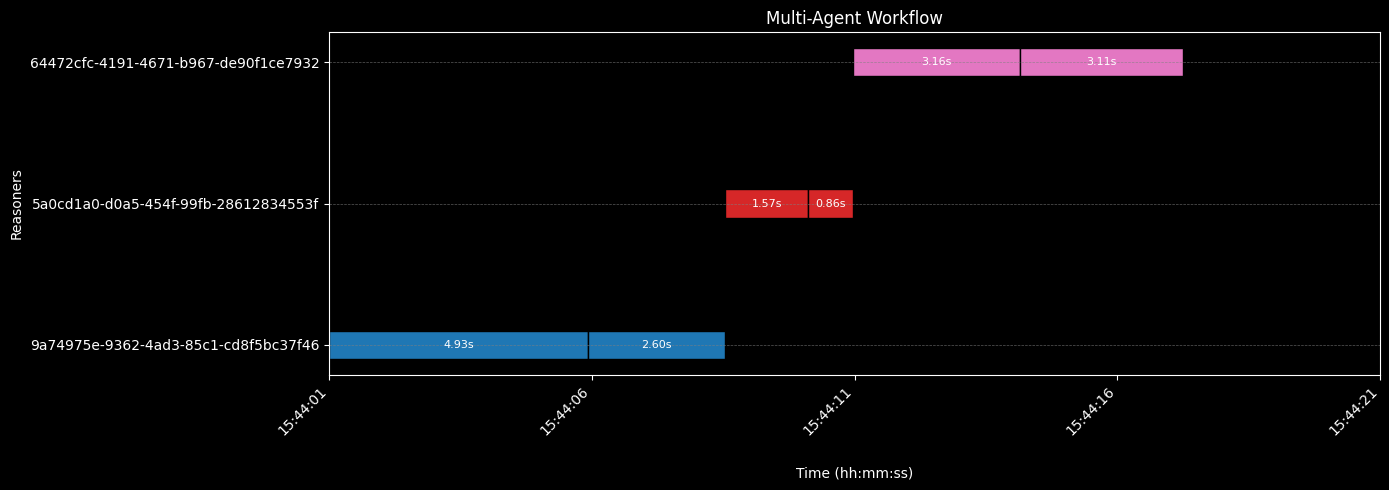

In [54]:
from brain.visualize import plot_workflow_matplotlib
lineage=brain_client.get_call_graph('2475cd71-9ac8-4ced-b635-e577f84c4b36')
fig=plot_workflow_matplotlib(lineage['lineage'])